Tweets from [LTATrafficNews](https://twitter.com/ltatrafficnews?lang=en) were scrapped using [twitterscraper](https://github.com/taspinar/twitterscraper). Currently limited to approx. 800 tweets which is the limit for the number of tweets shown on the page. Note that the data collected is between 2019-12-12 10:24:15 GMT and 2019-12-29 03:07:00 GMT.

In this exercise, we try to extract information from text and time data to understand possible patterns. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('tweets_lta.json', encoding='utf-8')

In [3]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,False,0,[],,0,[],...,LTAtrafficnews,Accident on PIE (towards Tuas) after KPE Exit ...,"<p class=""TweetTextSize TweetTextSize--normal ...",2019-12-29 03:07:00,2019-12-29 03:07:00,1211121410766016512,/LTAtrafficnews/status/1211121410766016518,4291685673,LTATrafficNews,
1,False,[],[],False,False,0,[],,0,[],...,LTAtrafficnews,Accident on PIE (towards Tuas) after KPE Exit....,"<p class=""TweetTextSize TweetTextSize--normal ...",2019-12-29 02:51:09,2019-12-29 02:51:09,1211117421861298176,/LTAtrafficnews/status/1211117421861298180,4291685673,LTATrafficNews,
2,False,[],[],False,False,0,[],,0,[],...,LTAtrafficnews,Accident on MCE (towards ECP) before ECP (Chan...,"<p class=""TweetTextSize TweetTextSize--normal ...",2019-12-29 01:32:59,2019-12-29 01:32:59,1211097750319714304,/LTAtrafficnews/status/1211097750319714306,4291685673,LTATrafficNews,
3,False,[],[],False,False,0,[],,0,[],...,LTAtrafficnews,Accident on MCE (towards ECP) before ECP (Chan...,"<p class=""TweetTextSize TweetTextSize--normal ...",2019-12-29 01:13:26,2019-12-29 01:13:26,1211092828618555392,/LTAtrafficnews/status/1211092828618555392,4291685673,LTATrafficNews,
4,False,[],[],False,False,0,[],,0,[],...,LTAtrafficnews,Accident on West Coast Highway (towards City) ...,"<p class=""TweetTextSize TweetTextSize--normal ...",2019-12-29 00:28:50,2019-12-29 00:28:50,1211081606993080320,/LTAtrafficnews/status/1211081606993080320,4291685673,LTATrafficNews,


In [4]:
df.dtypes

has_media                     bool
hashtags                    object
img_urls                    object
is_replied                    bool
is_reply_to                   bool
likes                        int64
links                       object
parent_tweet_id             object
replies                      int64
reply_to_users              object
retweets                     int64
screen_name                 object
text                        object
text_html                   object
timestamp           datetime64[ns]
timestamp_epochs    datetime64[ns]
tweet_id                     int64
tweet_url                   object
user_id                      int64
username                    object
video_url                   object
dtype: object

In [5]:
df.timestamp.min()

Timestamp('2019-12-12 10:24:15')

In [6]:
df.timestamp.max()

Timestamp('2019-12-29 03:07:00')

In [7]:
df.has_media.unique()

array([False])

In [8]:
df.shape

(820, 21)

In [9]:
df.likes.max()

11

In [10]:
df.text

0      Accident on PIE (towards Tuas) after KPE Exit ...
1      Accident on PIE (towards Tuas) after KPE Exit....
2      Accident on MCE (towards ECP) before ECP (Chan...
3      Accident on MCE (towards ECP) before ECP (Chan...
4      Accident on West Coast Highway (towards City) ...
5      Accident on MCE (towards ECP) before ECP (Chan...
6      Accident on MCE (towards ECP) before ECP (Chan...
7      Fire on MCE (towards ECP) before ECP (Changi) ...
8      Accident on PIE (towards Changi Airport) after...
9           Accident at Jalan Eunos/Sims Avenue Junction
10     Accident on SLE (towards BKE) before Mandai Rd...
11     Accident on SLE (towards BKE) before Mandai Rd...
12     Accident on SLE (towards BKE) before Mandai Rd...
13     Accident on CTE (towards SLE) after Braddell R...
14     Accident on KPE (towards TPE) before Tampines ...
15     Accident on KPE (towards TPE) before Tampines ...
16     Accident on Eng Neo Avenue (towards Fairways D...
17     Accident on PIE (towards

### Getting type of incidents
#### Method 1:  Extract first few letters of text

In [11]:
df['first_word'] = df['text'].str[:9]

#### Type of incidents

In [12]:
df.first_word.unique()

array(['Accident ', 'Fire on M', 'Obstacle ', 'Heavy Tra', 'Road Clos',
       '[NSL] UPD'], dtype=object)

#### Method 2: Extract text before certain words eg. on, at, in

In [13]:
df['road'] = df['text'].str.split('on|at|in', 1).str[0].str.strip()

In [14]:
df.road

0           Accident
1           Accident
2           Accident
3           Accident
4           Accident
5           Accident
6           Accident
7               Fire
8           Accident
9           Accident
10          Accident
11          Accident
12          Accident
13          Accident
14          Accident
15          Accident
16          Accident
17          Accident
18          Accident
19          Accident
20          Accident
21          Accident
22          Accident
23          Accident
24          Obstacle
25          Obstacle
26          Obstacle
27          Accident
28          Accident
29          Accident
           ...      
790         Accident
791         Accident
792         Accident
793         Accident
794         Accident
795         Accident
796         Accident
797         Accident
798         Accident
799         Accident
800         Obstacle
801         Accident
802         Accident
803    Heavy Traffic
804         Accident
805         Accident
806         O

#### Type of incidents

In [15]:
df.road.unique()

array(['Accident', 'Fire', 'Obstacle', 'Heavy Traffic', 'Road Closure',
       '[NSL] UPDATE: Due to a signall'], dtype=object)

#### Breakdown of number of tweets by type of incidents

In [16]:
df.road.value_counts()

Accident                          657
Obstacle                          106
Heavy Traffic                      42
Road Closure                       13
Fire                                1
[NSL] UPDATE: Due to a signall      1
Name: road, dtype: int64

### Getting count by date/ day

In [17]:
import datetime

In [18]:
df['Date'] = [datetime.datetime.date(d) for d in df['timestamp']] 

#### Breakdown of number of tweets by Date

In [19]:
df['Date'].value_counts()

2019-12-14    80
2019-12-17    71
2019-12-15    61
2019-12-20    60
2019-12-21    58
2019-12-13    56
2019-12-23    56
2019-12-16    54
2019-12-27    52
2019-12-28    49
2019-12-26    44
2019-12-19    41
2019-12-24    40
2019-12-18    36
2019-12-25    25
2019-12-12    17
2019-12-22    15
2019-12-29     5
Name: Date, dtype: int64

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_name()

#### Breakdown of number of tweets by day of the week

In [21]:
df.day_of_week.value_counts()

Saturday     187
Friday       168
Tuesday      111
Monday       110
Thursday     102
Sunday        81
Wednesday     61
Name: day_of_week, dtype: int64

#### However note that the data might not contain the same number of days for each day of the week. So we look at total number of tweets by each day.

In [22]:
df.groupby(['Date','day_of_week'])['tweet_id'].count()

Date        day_of_week
2019-12-12  Thursday       17
2019-12-13  Friday         56
2019-12-14  Saturday       80
2019-12-15  Sunday         61
2019-12-16  Monday         54
2019-12-17  Tuesday        71
2019-12-18  Wednesday      36
2019-12-19  Thursday       41
2019-12-20  Friday         60
2019-12-21  Saturday       58
2019-12-22  Sunday         15
2019-12-23  Monday         56
2019-12-24  Tuesday        40
2019-12-25  Wednesday      25
2019-12-26  Thursday       44
2019-12-27  Friday         52
2019-12-28  Saturday       49
2019-12-29  Sunday          5
Name: tweet_id, dtype: int64

#### Let's plot a graph to visualize better.

In [23]:
import matplotlib

In [24]:
import matplotlib.pyplot as plt

In [25]:
count_df = df.groupby(['Date','day_of_week'])['tweet_id'].count()
count_df = count_df.reset_index()

In [26]:
count_df.rename(columns = {'tweet_id':'tweet_count'}, inplace = True)

In [27]:
count_df.head()

,Date,day_of_week,tweet_count
0,2019-12-12,Thursday,17
1,2019-12-13,Friday,56
2,2019-12-14,Saturday,80
3,2019-12-15,Sunday,61
4,2019-12-16,Monday,54


In [28]:
count_df.dates = matplotlib.dates.date2num(count_df.Date)

C:\Users\huixiang.chua\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [29]:
x = count_df.dates
y = count_df.tweet_count

In [30]:
x

array([737405., 737406., 737407., 737408., 737409., 737410., 737411.,
       737412., 737413., 737414., 737415., 737416., 737417., 737418.,
       737419., 737420., 737421., 737422.])

In [31]:
y

0     17
1     56
2     80
3     61
4     54
5     71
6     36
7     41
8     60
9     58
10    15
11    56
12    40
13    25
14    44
15    52
16    49
17     5
Name: tweet_count, dtype: int64

C:\Users\huixiang.chua\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


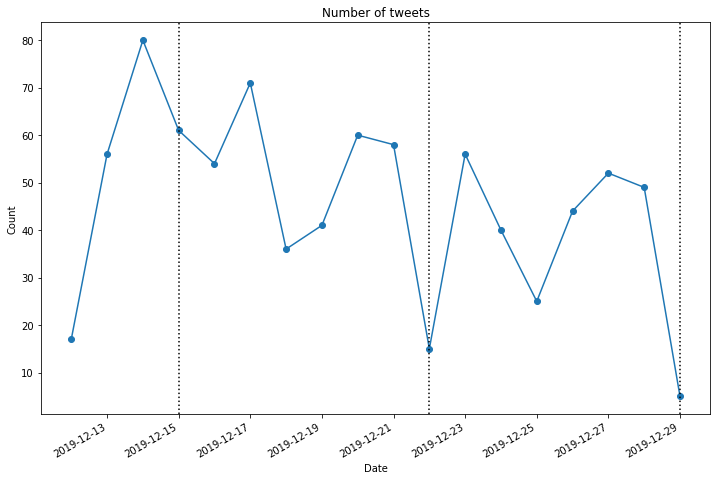

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot_date(x,y,'-o')
ax.set(xlabel="Date", ylabel="Count",
       title="Number of tweets")

plt.axvline(datetime.datetime(2019, 12, 15),color='black',ls='dotted')
plt.axvline(datetime.datetime(2019, 12, 22),color='black',ls='dotted')
plt.axvline(datetime.datetime(2019, 12, 29),color='black',ls='dotted')
plt.gcf().autofmt_xdate()

Sundays are marked by the dotted lines.

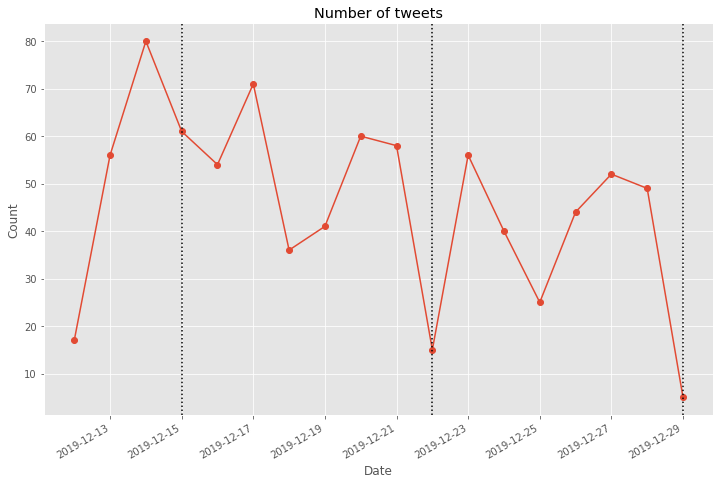

In [33]:
plt.style.use('ggplot')  #using ggplot style
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot_date(x,y,'-o')
ax.set(xlabel="Date", ylabel="Count",
       title="Number of tweets")

plt.axvline(datetime.datetime(2019, 12, 15),color='black',ls='dotted')
plt.axvline(datetime.datetime(2019, 12, 22),color='black',ls='dotted')
plt.axvline(datetime.datetime(2019, 12, 29),color='black',ls='dotted')
plt.gcf().autofmt_xdate()

#### Conclusion: Based on a two-week period, not much consistencies in incident count across the week. Also, it seems like Christmas doesn't have a lot of incidents.